In [1]:
import cf
import cfplot as cfp

In [2]:
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# pp-files for UKCA, individual files
inukca=cf.read(ukcadata,select='stash_code=50219')[0]

# Bodeker Total Column Ozone dataset - **preprocessed**
inobs=cf.read(obsdata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [4]:
# time constraint for loading, want March 2011 for the northern hemisphere
imonth=3
iyear=2011
ilat=90.0

In [5]:
# ukca data
ukca = inukca.subspace(T=cf.wi(cf.dt(str(iyear)+'-'+str(imonth)+'-01'),cf.dt(str(iyear)+'-'+str(imonth+1)+'-01'))).squeeze()

# obs data
obs = inobs.subspace(T=cf.wi(cf.dt(str(iyear)+'-'+str(imonth)+'-01'),cf.dt(str(iyear)+'-'+str(imonth+1)+'-01'))).squeeze()

In [6]:
# set the levels to use
cfp.levs(min=200, max=450, step=25)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:982

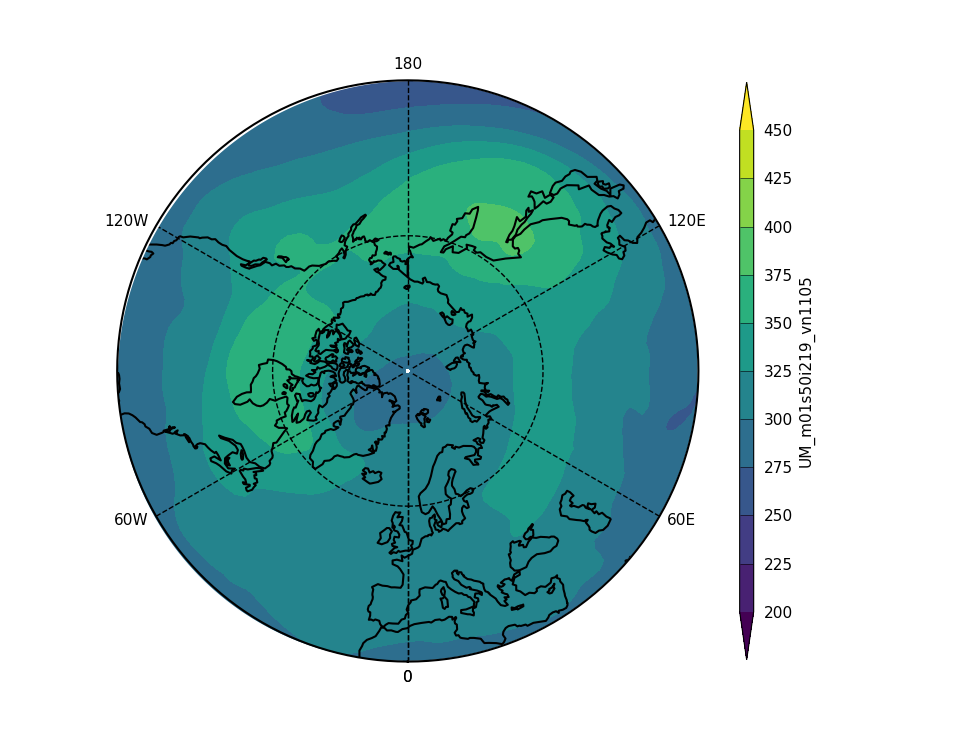

In [7]:
cfp.gopen()
cfp.mapset(proj='npstere', boundinglat=30, lon_0=0)
cfp.con(ukca, lines=False)
cfp.gclose()

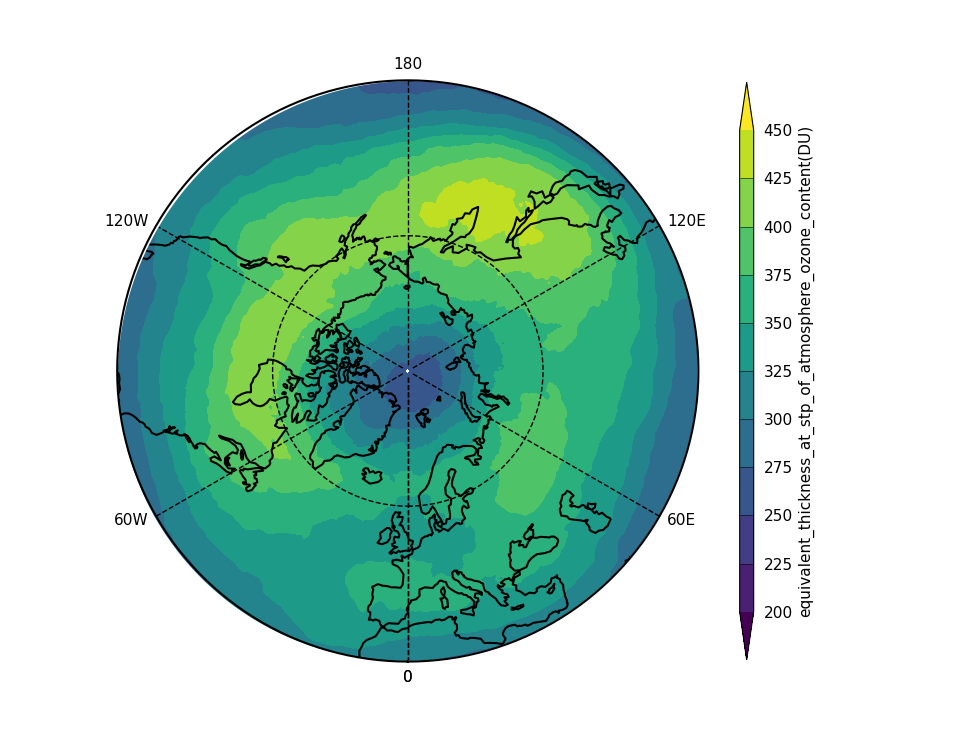

In [8]:
cfp.mapset(proj='npstere', boundinglat=30, lon_0=0)
cfp.con(obs, lines=False)

In [9]:
# regrid the UKCA to the Bodeker grid to allow for differencing
ukca_regrid=ukca.regrids(obs, 'linear')

In [10]:
# calculate differences
# absolute
diff_abs=ukca_regrid.copy()
diff_abs.data=ukca_regrid.data - obs.data
# percentage
diff_pc=ukca_regrid.copy()
diff_pc.data=100.0*((ukca_regrid.data - obs.data)/ukca_regrid.data)

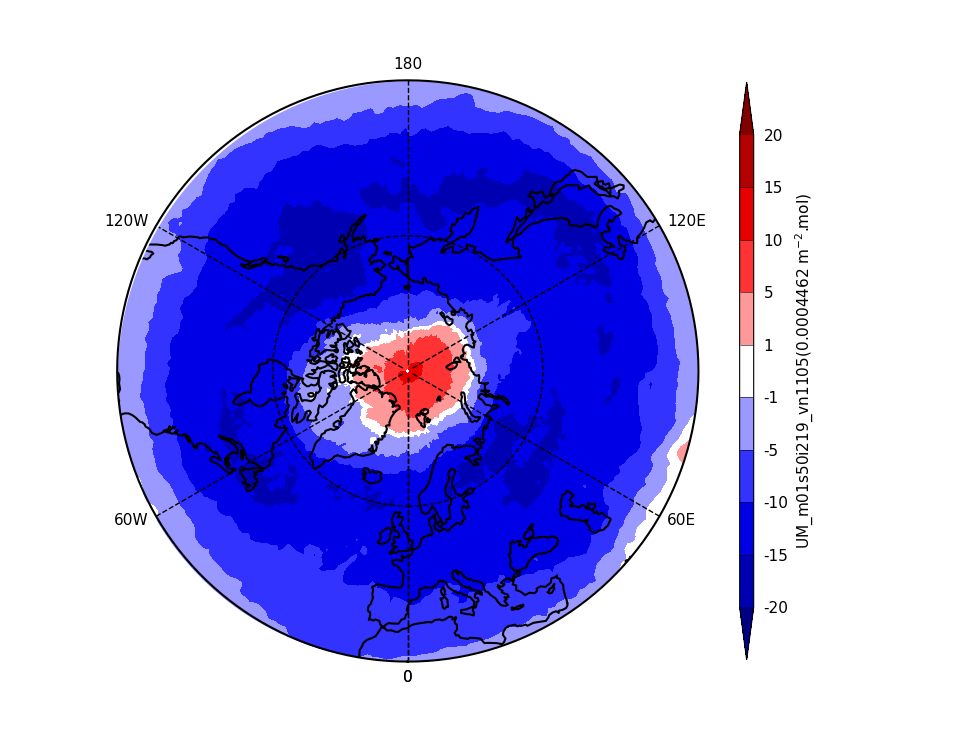

In [11]:
# set the levels to use
cfp.levs(manual=[-20,-15,-10,-5,-1,1,5,10,15,20])
# use bwr
cfp.cscale(scale='BlWhRe')
cfp.mapset(proj='npstere', boundinglat=30, lon_0=0)
cfp.con(diff_pc, lines=False)

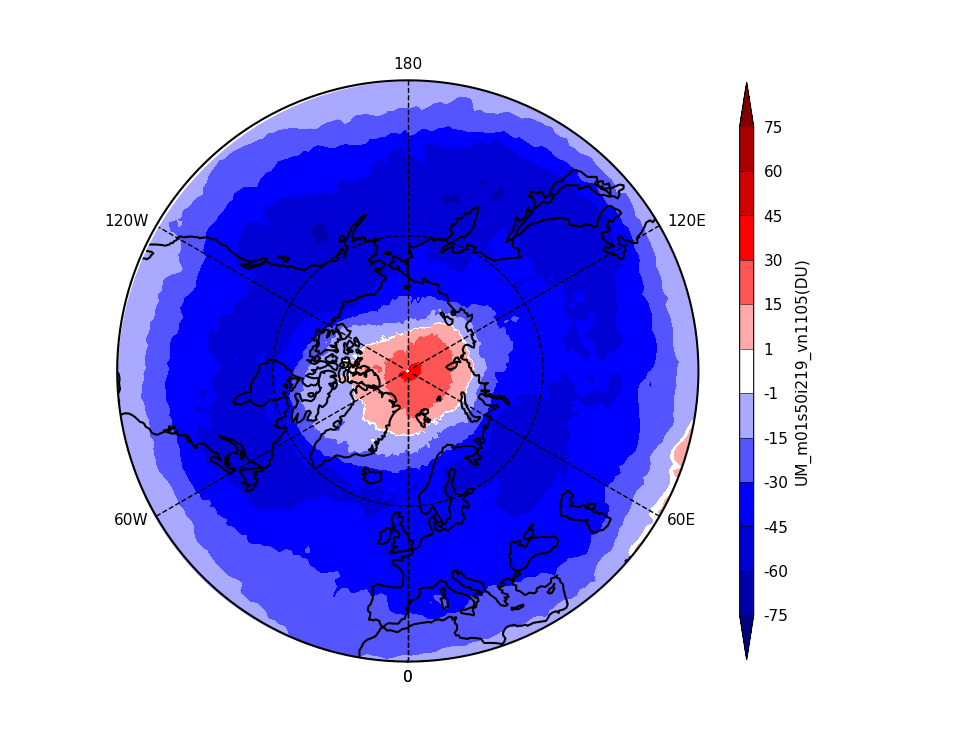

In [12]:
# set the levels to use
cfp.levs(manual=[-75,-60,-45,-30,-15,-1,1,15,30,45,60,75])
# use bwr
cfp.cscale(scale='BlWhRe')
cfp.mapset(proj='npstere', boundinglat=30, lon_0=0)
cfp.con(diff_abs, lines=False)